#Defining the question

Can we predict the individuals most likely to have a bank account? 

A premonition is made that using the available data; predictions can be made to dins which individuals are most likely to have a bank account. The data available is data that has been collected that has a few parameters to the type of individual in question and whether or not they have a bank account. The data collected is a part (sample) of the data of the whole population which is the population of the four states in scope [Kenya, Uganda, Tanzania and Rwanda]. As planned, the data shall be looked at in the case to which factors of individuals not having a bank account and having a bank account shall be looked at and models for predictions shall be created. The appropriateness of the data shall be looked at within itself i.e the ratio to which samples with or without Bank accounts shall be looked at as a metric for testing the data appropriateness.

Form the above the following questions arise:
1. How can we predict indiniduals most likely to have a bank accont?
2. What attributes weigh in heavily in samples having a bank account?


#Reading the data

##Prerequisites

###Importing libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


###Importing Datasets

In [44]:
with open('/content/Financial Dataset - 1.csv') as d:
  fin = pd.read_csv(d)

#Checking the data

An overlook of the data is done within this section. The beginning and the end of the dataset are looked at and also the data type to which is interpreted as is examined it.

###Previewing the dataset

In [45]:
fin.head(10)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7.0,26.0,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,No,Rural,Yes,7.0,32.0,Female,Spouse,Married/Living together,Primary education,Self employed
7,Kenya,2018,uniqueid_8,No,Rural,Yes,1.0,42.0,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3.0,54.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
9,Kenya,2018,uniqueid_10,No,Urban,Yes,3.0,76.0,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent


In [46]:
fin.tail(10)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23514,Uganda,2018,uniqueid_2107,No,Urban,Yes,NaN,24.0,Female,Spouse,Married/Living together,Primary education,Self employed
23515,Uganda,2018,uniqueid_2108,No,Rural,No,NaN,16.0,Male,Parent,Single/Never Married,Primary education,Other Income
23516,Uganda,2018,uniqueid_2109,No,Urban,Yes,NaN,35.0,Male,Head of Household,Married/Living together,Primary education,Self employed
23517,Uganda,2018,uniqueid_2110,No,Urban,Yes,NaN,16.0,Male,Parent,Single/Never Married,Primary education,Other Income
23518,Uganda,2018,uniqueid_2111,No,Rural,Yes,NaN,20.0,Female,Child,Single/Never Married,Primary education,No Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


###Data types

In [47]:
#Gets the datatypes of the dataset
fin.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

##Data Understanding

In [48]:
#Checking for null values
fin.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [49]:
#Dropping the rows with null values
fin.dropna(inplace=True)

In [50]:
#Making a descriptive dataframe of the data contained within the dataset.

u = pd.DataFrame(fin.isnull().sum())
u.columns = ['No. of NaN']
u['Combinations'] = ''
q = u.index
for c in q:
  u.loc[c , 'Combinations'] = len(fin[c].unique())

u

,No. of NaN,Combinations
country,0,4
year,0,6
uniqueid,0,8687
Has a Bank account,0,2
Type of Location,0,2
Cell Phone Access,0,2
household_size,0,21
Respondent Age,0,85
gender_of_respondent,0,2
The relathip with head,0,6


In [51]:
u['Unique'] = ''

for q, row in u.iterrows():
  if row['Combinations'] < 22:
    u.loc[q,'Unique'] = str(fin[q].unique())

u

,No. of NaN,Combinations,Unique
country,0,4,['Kenya' 'Rwanda' 'Tanzania' 'Uganda']
year,0,6,[2018 2029 2056 2016 2039 2017]
uniqueid,0,8687,
Has a Bank account,0,2,['Yes' 'No']
Type of Location,0,2,['Rural' 'Urban']
Cell Phone Access,0,2,['Yes' 'No']
household_size,0,21,[ 3. 5. 8. 7. 1. 6. 4. 10. 2. 11. 9. 1...
Respondent Age,0,85,
gender_of_respondent,0,2,['Female' 'Male']
The relathip with head,0,6,['Spouse' 'Head of Household' 'Other relative'...


In [52]:
fin.shape

(23343, 13)

In [53]:
#Makes a dataset with the number of null values, the possible data combinations
#and the unique values that are within the data set and the type of data that the 
#columns possess

t = pd.DataFrame(fin.dtypes)
t.columns = ['Types']
u = pd.merge(u,t , left_index=True,right_index=True)
u

,No. of NaN,Combinations,Unique,Types
country,0,4,['Kenya' 'Rwanda' 'Tanzania' 'Uganda'],object
year,0,6,[2018 2029 2056 2016 2039 2017],int64
uniqueid,0,8687,,object
Has a Bank account,0,2,['Yes' 'No'],object
Type of Location,0,2,['Rural' 'Urban'],object
Cell Phone Access,0,2,['Yes' 'No'],object
household_size,0,21,[ 3. 5. 8. 7. 1. 6. 4. 10. 2. 11. 9. 1...,float64
Respondent Age,0,85,,float64
gender_of_respondent,0,2,['Female' 'Male'],object
The relathip with head,0,6,['Spouse' 'Head of Household' 'Other relative'...,object


In [54]:
#Lists all the combinations of the columns that are less than 22 unique values

u['Unique'] = ''

for q, row in u.iterrows():
  if row['Combinations'] < 22 and row['Combinations'] > 5:
    print (fin[q].unique())
    print('\n')


[2018 2029 2056 2016 2039 2017]


[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21.  0.
 18. 17. 20.]


['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives']


['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA' '6']


['Self employed' 'Government Dependent' 'Formally employed Private'
 'Informally employed' 'Formally employed Government'
 'Farming and Fishing' 'Remittance Dependent' 'Other Income'
 'Dont Know/Refuse to answer' 'No Income']




#External Data Source Validation

As mentioned, the evalidation of the data will be validated within itself. This is, if the ratio of the number within the dataset of samples with and without bank accounts has a delta of less than 4% (abitrary number) of the given ratio of the whole population which is 13.9%; the data shall be taken as valid.

In [55]:
r = fin.copy()

r['count'] = 1

r = r.groupby(['Has a Bank account']).sum()
r = r.drop(columns = ['year', 'household_size', 'Respondent Age'])

In [56]:
print ('The percentage of the number of sample with bank accounts is:')
print ((r.loc['Yes', 'count']/(r.loc['No', 'count']+r.loc['Yes', 'count']))* 100)

The percentage of the number of sample with bank accounts is:
14.124148567022235


The delta is approxiamately 2% which with the presumption; can be taken as valid data for analysis.

#Tidying the dataset

In [57]:
fin = fin[fin['year'] < 2020]

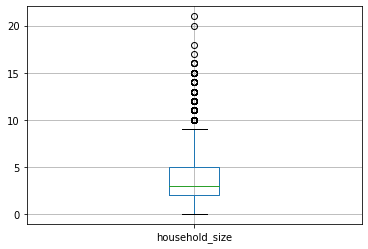

In [58]:
fin.boxplot(['household_size'])

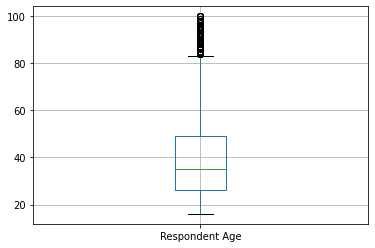

In [59]:
fin.boxplot(['Respondent Age'])

In [60]:
fin = fin[fin['Level of Educuation'] != '6']
fin['Level of Educuation'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

In [61]:
out = ['household_size' , 'Respondent Age' ]
for z in out:
  q1 = fin[z].quantile(0.25)
  q3 = fin[z].quantile(0.75)
  iqr = q3 - q1
  lim = iqr * 1.5
  fin = fin [fin[z] >= (q1 - lim)]
  fin = fin [fin[z] <= (q3 + lim)]

#Exploratory analysis

##Numerical data analysis

Within this section the numerical data within the dataset is looked at. That is the number of persons per household and the age of the respondent. A caveat is also taken into account to which the ages are biased on the respondent being described as either 'Spouse' ,'Head of Household' or 'Parent' to which will act as an indicator for the size of the family. 

An presumption is made that the older the respondent the higher the chace of them having a large household number. This is investigated here.

In [62]:
#Filtering the dataset so as to get the necessary records.
l = ['Spouse' ,'Head of Household','Parent']
h = fin[fin['The relathip with head'].isin(l)]

In [63]:
#Gets the descriptive statistics for the column household size
h['household_size'].describe()

count    19749.000000
mean         3.430604
std          2.045935
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          9.000000
Name: household_size, dtype: float64

In [64]:
#Gets the descriptive statistics for the column Respondent age
h['Respondent Age'].describe()

count    19749.000000
mean        40.521950
std         15.328147
min         16.000000
25%         29.000000
50%         37.000000
75%         50.000000
max         83.000000
Name: Respondent Age, dtype: float64

In [65]:
#Examining the relatioship between the two datapoints

h["household_size"].corr(h["Respondent Age"], method="pearson") 

-0.0300040673024741

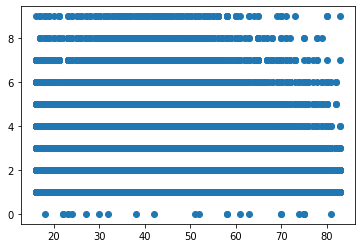

In [66]:
plt.scatter( h['Respondent Age'],h["household_size"])

From the above we can tell that there is no relationship between the size of family [household] and the age of the respondent.

##Visual data analysis

###Graphed data

Percentage of the population that has a bank account.

([<matplotlib.patches.Wedge at 0x7efe99328860>,
 [Text(-0.9919134002887668, 0.4755079455987846, 'No'),
  Text(0.9919133780286321, -0.47550799203360217, 'Yes')],
 [Text(-0.5410436728847818, 0.2593679703266098, '85.8%'),
  Text(0.5410436607428901, -0.2593679956546921, '14.2%')])

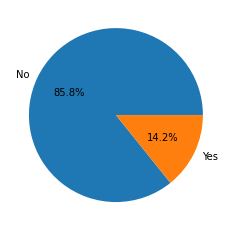

In [67]:
g = fin.copy()
g['Count'] = 1
ban = g.groupby('Has a Bank account').sum()
plt.pie(ban['Count'], labels= ban.index, autopct = '%1.1f%%')

Comparing the population per country of the available data.

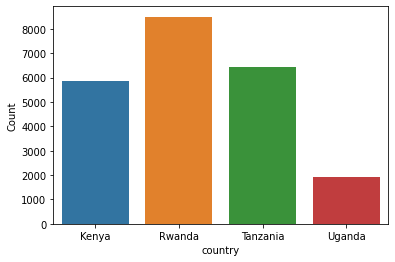

In [139]:
g = fin.copy()
g['Count'] = 1 
y = g.groupby(['country']).sum()
y.drop(columns=['year', 'household_size', 'Respondent Age'] , inplace =True)

sns.barplot( x = y.index , y = 'Count', data = y)

The ratio of the population with bank accounts in all the countries in the dataset.

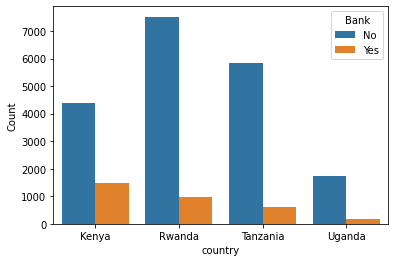

In [69]:
g = fin.copy()
g['Count'] = 1 
y = g.groupby(['country','Has a Bank account']).sum()
y.drop(columns=['year', 'household_size', 'Respondent Age'] , inplace =True)

y['Bank'] = y.index.get_level_values(1)
sns.barplot( x = y.index.get_level_values(0) , y = 'Count' ,hue = 'Bank' , data = y)

The ratio of the rural to urban population sampled with the data.

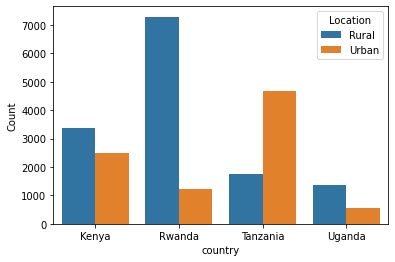

In [68]:
g = fin.copy()
g['Count'] = 1 
y = g.groupby(['country','Type of Location']).sum()
y.drop(columns=['year', 'household_size', 'Respondent Age'] , inplace =True)

y['Location'] = y.index.get_level_values(1)
sns.barplot( x = y.index.get_level_values(0) , y = 'Count' ,hue = 'Location' , data = y)

Source of income compared to the state of having a bank account.

[Text(0, 0, 'Dont Know/Refuse to answer'),
 Text(0, 0, 'Farming and Fishing'),
 Text(0, 0, 'Formally employed Government'),
 Text(0, 0, 'Formally employed Private'),
 Text(0, 0, 'Government Dependent'),
 Text(0, 0, 'Informally employed'),
 Text(0, 0, 'No Income'),
 Text(0, 0, 'Other Income'),
 Text(0, 0, 'Remittance Dependent'),
 Text(0, 0, 'Self employed')]

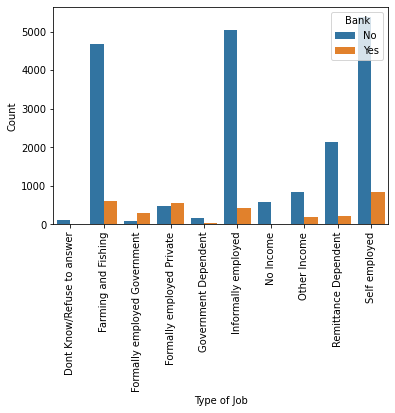

In [70]:
g = fin.copy()
g['Count'] = 1 
y = g.groupby(['Type of Job','Has a Bank account']).sum()
y.drop(columns=['year', 'household_size', 'Respondent Age'] , inplace =True)

y['Bank'] = y.index.get_level_values(1)
job = sns.barplot( x = y.index.get_level_values(0) , y = 'Count' ,hue = 'Bank' , data = y)
job.set_xticklabels(job.get_xticklabels() , rotation = 90)

The level of education and the ration of the state of having a bank account.

[Text(0, 0, 'No formal education'),
 Text(0, 0, 'Other/Dont know/RTA'),
 Text(0, 0, 'Primary education'),
 Text(0, 0, 'Secondary education'),
 Text(0, 0, 'Tertiary education'),
 Text(0, 0, 'Vocational/Specialised training')]

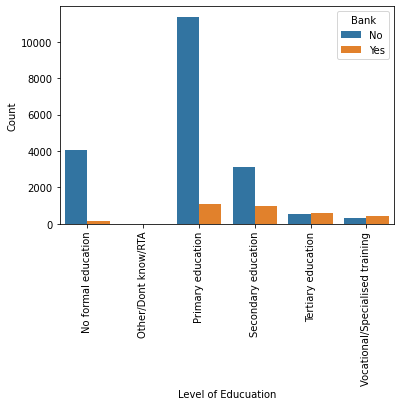

In [71]:
g = fin.copy()
g['Count'] = 1 
y = g.groupby(['Level of Educuation','Has a Bank account']).sum()
y.drop(columns=['year', 'household_size', 'Respondent Age'] , inplace =True)

y['Bank'] = y.index.get_level_values(1)
edu = sns.barplot( x = y.index.get_level_values(0) , y = 'Count' ,hue = 'Bank' , data = y)
edu.set_xticklabels(edu.get_xticklabels() , rotation = 90)


###Summary from the graphed data

From the above data we can visually note the following:
1. Majority of the population do not have bank accounts for the usable information from the dataset.
2. The popularity of bank accounts within the dataset according to the countries is in the order: Kenya, Rwandam, Tanzania followed by Uganda.
3. There is a bias on the samples from rural areas which according to the region have less and more inaccessible banks thus biasing the whole of the data derived from the dataset towards rural setting.
4. Formally employed samples have a more neutral ratio of having bank accounts.
5. By the ratios of the educational levels of the population with the state of having a bank account; it seems there is a popularity with having a bank account with the higher level of education.

##Predictive data analysis

In [112]:
#copys the dataset to a new new variable for the section
l = fin.copy()
l.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [113]:
#Drops the columns that dont affect the outcome of the state of having a bank account.
l.drop(columns= ['year', 'uniqueid'], inplace = True)
l.columns
yn = l['Has a Bank account']

In [114]:
#Making a dictionary for the values of the label encoder

ldict = {}
co = l.columns
for r in co:
  l[r] = le.fit_transform(l[r])
  ldict[r] =list(le.classes_)

In [116]:
#Converts most of the object data [Words and descriptions] into a mathematically manipulatable number.

sam = l.drop(columns=['Has a Bank account'])
unsam = l['Has a Bank account']
sam

,country,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,0,0,1,3,8,0,5,2,3,9
1,0,0,0,5,54,0,1,4,0,4
2,0,1,1,5,10,1,3,3,5,9
3,0,0,1,5,18,0,1,2,2,3
4,0,1,0,8,10,1,0,3,2,5
...,...,...,...,...,...,...,...,...,...,...
23512,3,0,0,2,41,0,1,0,0,7
23519,3,0,1,4,32,0,1,0,0,7
23520,3,0,1,2,11,0,1,3,3,7
23521,3,0,1,5,11,0,4,4,2,7


###Prinicple Component Analysis

The variable data within the dataset is processed and computed to find the variance each of the attributes has on the state of having a bank account.

In [117]:
samp = sam.copy()

In [118]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
samp = sc.fit_transform(samp)
samp

array([[-1.30056388, -0.80337069,  0.58114844, ..., -0.38411351,
         0.82475002,  1.16028809],
       [-1.30056388, -0.80337069, -1.72073075, ...,  1.62264751,
        -1.67738729, -0.45714105],
       [-1.30056388,  1.24475539,  0.58114844, ...,  0.619267  ,
         2.49284155,  1.16028809],
       ...,
       [ 1.96945274, -0.80337069,  0.58114844, ...,  0.619267  ,
         0.82475002,  0.51331643],
       [ 1.96945274, -0.80337069,  0.58114844, ...,  1.62264751,
        -0.00929575,  0.51331643],
       [ 1.96945274,  1.24475539,  0.58114844, ..., -2.39087453,
         0.82475002,  1.16028809]])

In [119]:
from sklearn.decomposition import PCA

pca = PCA()
samp = pca.fit_transform(samp)

ev = pca.explained_variance_ratio_

ev

array([0.19271175, 0.1606037 , 0.15475363, 0.10182862, 0.08255872,
       0.08095657, 0.07219888, 0.05725031, 0.0538095 , 0.04332833])

In [120]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
samp_pca = pca.fit_transform(samp)
samp_pca

array([[ 0.17010939],
       [ 0.63475185],
       [-0.00439116],
       ...,
       [-1.05156807],
       [-0.86222827],
       [-1.08532194]])

The weighting of the attributes that are used in finding the PCA are as follows:

In [135]:
ev

array([0.19271175, 0.1606037 , 0.15475363, 0.10182862, 0.08255872,
       0.08095657, 0.07219888, 0.05725031, 0.0538095 , 0.04332833])

###Linear Discriminant Analysis

The variable data within the dataset is processed and computed to find the variance the state of having a bank account has relative to the available data within the datase..

In [121]:
saml = sam.copy()

In [122]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
saml = sc.fit_transform(saml)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
saml = lda.fit_transform(saml, unsam)
saml

array([[ 0.60376623],
       [-1.23631839],
       [ 2.74086959],
       ...,
       [-0.39311242],
       [-1.22404067],
       [ 0.11957138]])

#Implementing the solution

Using the data that has been processed above. The singular dimension of the data is now used to predict the outcome of new samples that will be collected.

##PCA

In [132]:
from sklearn.model_selection import train_test_split
samp_train, samp_test, unsam_train, unsam_test = train_test_split(samp, yn, test_size=0.2, random_state=0)

In [133]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(samp_train, unsam_train)
samp_pred = classifier.predict(samp_test)

In [134]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(unsam_train, samp_pred)

print('Accuracy' + str(accuracy_score(y_test, y_pred)))

ValueError: ignored

##LCA

In [127]:
from sklearn.model_selection import train_test_split
saml_train, saml_test, unsam_train, unsam_test = train_test_split(saml, yn, test_size=0.2, random_state=0)

In [128]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(saml_train, unsam_train)
saml_pred = classifier.predict(saml_test)

In [130]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(unsam_train, saml_pred)

ValueError: ignored

#Challenging the solution

As seen above within the data analysis most of the acquired data is heavily biased on the rural areas on the countries described in the dataset.

#Follow up questions

From the above the following questions have come up:
1. Can the data be adjusted to accomodate the variance of population per country?
2. Is there a prediction that can be made for people most likely not to have a bank account and is that information usefull?
3. How heavily does that data vary with the selected sample size and will stratifying be indicative of the whole population for any given strata?

#Do we need other data to answer our question?

Yes. From all the data analysed above, there is very little data whereby the samples have a bias to having a preference to having a bank account.